#Requirements

 Customer  runs a books e-shop in Czechia.
They are preparing the international version of their webpage. They select the most relevant books and most interesting authors for the Czech audience based on their experience.

They do not know what books and authors would be **relevant for the international audience. **


This is the information you have from your client:
They have 2 main pages: Books and Authors.
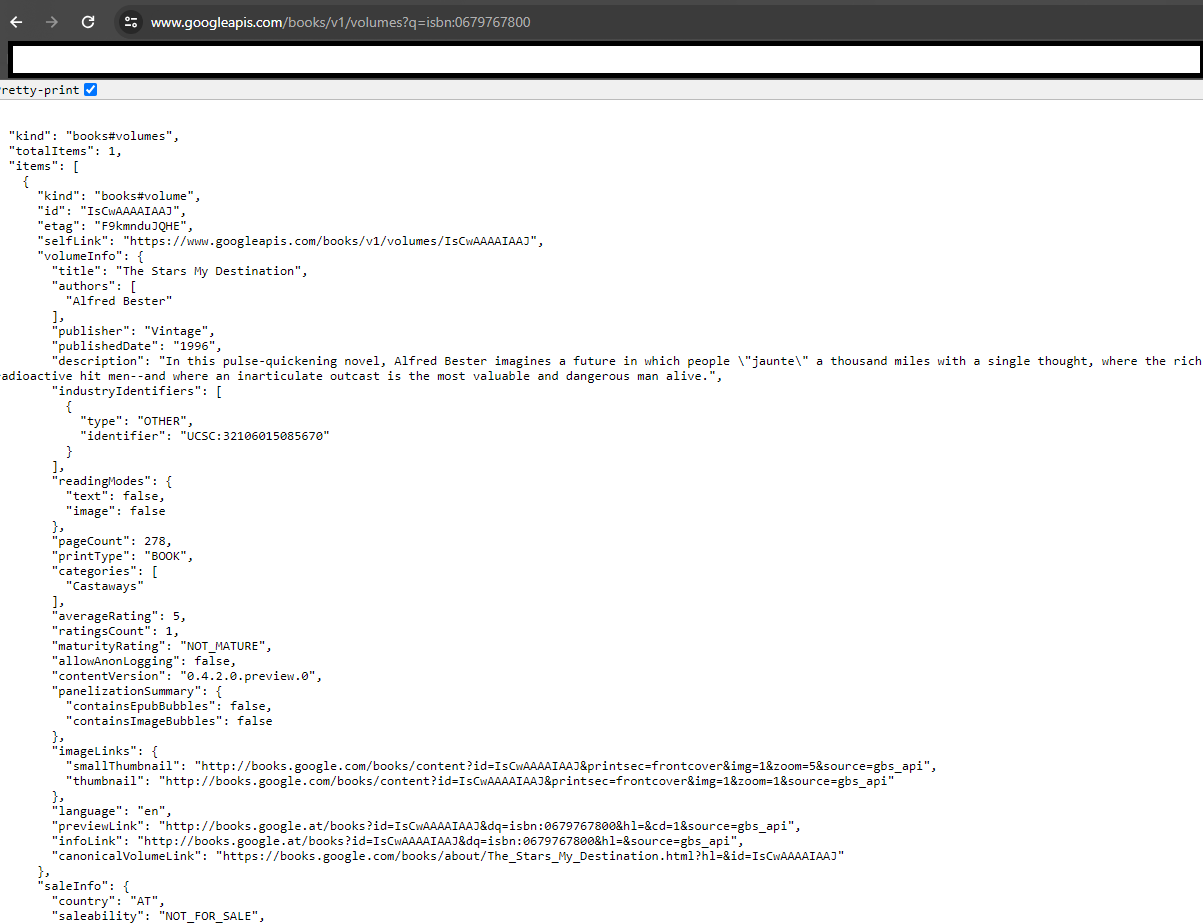
They want additional information to be displayed to both Books and Authors. They do not care about copyright, you can use available APIs (Goodreads, Google Books API, Wikipedia API… )
You can have 2 calls (5 minutes each) with the client throughout the day, if you have any questions.


#Setup

##Library imports

In [4]:
# !pip install pycountry

In [5]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from dateutil.parser import parse
import plotly.express as ex
# import pycountry
import json
from urllib.request import urlopen
import pprint

##Book recomandation dataset imports

In [6]:
!pip install kaggle

In [7]:
!ls

sample_data


In [8]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"lavinia04","key":"fdab69fa52ba6604a43a5b221d6ac714"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [74]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [75]:
api.dataset_download_files('arashnic/book-recommendation-dataset', unzip = True)
# kaggle datasets download -d arashnic/book-recommendation-dataset - download commmand from kaggle

Dataset URL: https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset


In [11]:
df_books = pd.read_csv('Books.csv')
df_ratings = pd.read_csv('Ratings.csv')
df_users = pd.read_csv('Users.csv')

<ipython-input-11-3c363646951a>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_books = pd.read_csv('Books.csv')


##Authors

In [12]:
api.dataset_download_files('choobani/goodread-authors', unzip = True)

Dataset URL: https://www.kaggle.com/datasets/choobani/goodread-authors


In [13]:
da = pd.read_csv('final_dataset.csv')

In [14]:
da.head(10)

,authorid,name,workcount,fan_count,gender,image_url,about,born,died,influence,average_rate,rating_count,review_count,website,twitter,genre,original_hometown,country,latitude,longitude
0,8409092,Jason Wallace,2,13,male,https://images.gr-assets.com/authors/148926684...,Jason Wallace is related to Tolkien and a desc...,NaN,NaN,NaN,3.74,1028,175,NaN,NaN,NaN,Cheltenham,United Kingdom,51.90006,-2.07972
1,5796406,Rosan Hollak,4,0,unknown,https://s.gr-assets.com/assets/nophoto/user/u_...,NaN,NaN,NaN,NaN,3.73,15,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8421525,Nanna Foss,6,156,female,https://images.gr-assets.com/authors/140908587...,Danish YA writer. <br /><br />I make up storie...,NaN,NaN,NaN,4.35,1172,205,http://www.nannafoss.dk,NaN,"fantasy,fiction,paranormal",NaN,NaN,NaN,NaN
3,158146,Terri Savelle Foy,23,125,female,https://images.gr-assets.com/authors/147569460...,"For years, Terri Savelle Foy’s life was averag...",NaN,NaN,NaN,4.56,1054,151,http://www.terri.com,terrisavellefoy,"religion and spirituality,self help,spirituality",NaN,NaN,NaN,NaN
4,15340731,Vishwas Nangare Patil,1,127,unknown,https://s.gr-assets.com/assets/nophoto/user/u_...,NaN,NaN,NaN,NaN,4.15,725,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,7189636,Shweta Punj,2,3,unknown,https://s.gr-assets.com/assets/nophoto/user/u_...,NaN,NaN,NaN,NaN,3.65,231,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7816613,Connor Thompson,37,1,unknown,https://s.gr-assets.com/assets/nophoto/user/u_...,NaN,NaN,NaN,NaN,3.95,221,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5828690,Sonia Weitz,2,2,unknown,https://s.gr-assets.com/assets/nophoto/user/u_...,NaN,NaN,NaN,NaN,4.01,108,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,7271316,Phil Hamman,6,6,male,https://images.gr-assets.com/authors/144966390...,Phil Hamman is the co-author of the #1 nationa...,1958-03-07,NaN,NaN,3.83,1340,193,http://www.philhammanauthor.com/,philhamman,"biographies and memoirs,history,non fiction",NaN,NaN,NaN,NaN
9,7382112,Emma Jenner,1,3,unknown,https://s.gr-assets.com/assets/nophoto/user/u_...,NaN,NaN,NaN,NaN,3.75,103,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Google books API

API OUTPUT EXAMPLE for link https://www.googleapis.com/books/v1/volumes?q=isbn:0679767800

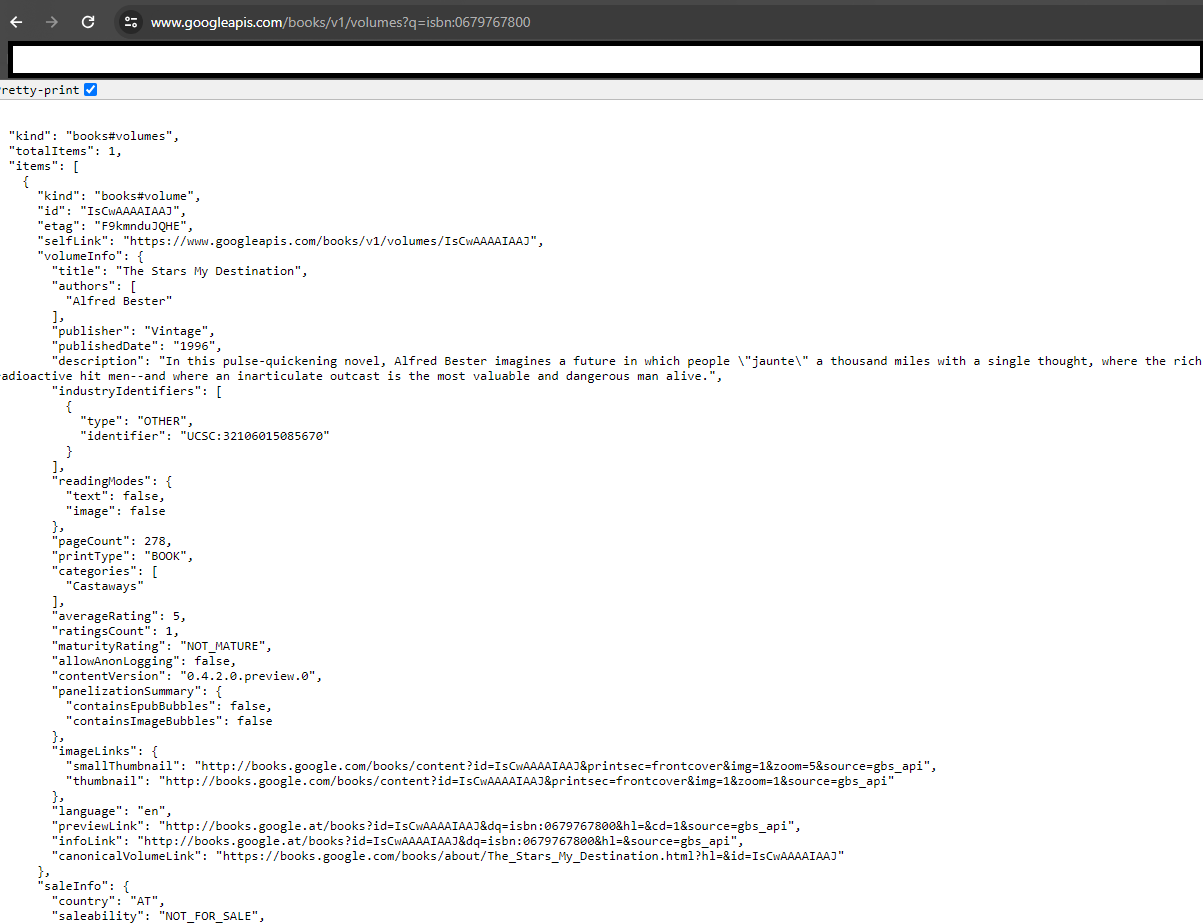

In [15]:
##https://gist.github.com/IT102Gists/aa31be3ac569878cc7df3a8b37ae25a4

# sample ISBN for testing: 0679767800

api = "https://www.googleapis.com/books/v1/volumes?q=isbn:"
isbn1 = '0679767800'
isbn2 = '1593276036'

# send a request and get a JSON response

# # parse JSON into Python as a dictionary
# def read_isbn(isbn):
#   resp = urlopen(api + isbn)
#   if resp.status == 200:
#           book_data = json.load(resp)
#           if book_data:
#               return book_data['items'][0]['volumeInfo']
#           else:
#               return None
#   else:
#           print(f"Error {resp.status_code}: {resp.text}")
#           return None


# # book_data
# # interested_in =  ['title', 'authors', 'publisher', 'publishedDate', 'description','pageCount', 'categories']
# result = pd.DataFrame()

# # pprint.pprint(apid)
# # print(f"\nTitle: {apid['Title']}")


# def populate_csv(isbn):
#   global result
#   book_data = read_isbn(isbn)
#   apid = {
#       'ISBN' : '',
#       'Title': book_data['title'],
#       'Authors': book_data['authors'],
#       'Publisher': book_data['publisher'],
#       'Published_Date': book_data['publishedDate'],
#       'Description': book_data['description'],
#       'Page_Count': book_data['pageCount'],
#       'Categories': book_data['categories']
#   }

#   new_df = pd.DataFrame([apid])
#   result = pd.concat([result, new_df], ignore_index=True)
#   return result

# populate_csv(isbn1)
# populate_csv(isbn1)
# result.info()

# def save_csv(result):
#   with open('Popular_Books.csv', 'w') as f:
#     result.to_csv(f)

# save_csv(result)

#Kaggle data exploration and cleaning

In [16]:
# db = df_books.copy()
#- not needed here as the data is downloaded from kaggle every run

#working with shorter names
db = df_books
dr = df_ratings
du = df_users

##Books

In [17]:
db.info()

db.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [18]:
display(db.head(5))
print(db.columns)
# #selecting relevant rows
db = db[['ISBN', 'Book-Title', 'Book-Author',
         'Year-Of-Publication', 'Publisher']]



,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')


###ISBN

In [19]:
db[db['ISBN'].duplicated(keep=False)]
#no dubplicates in ISBN

null_percentage = (db['ISBN'].isnull().sum() / len(db['ISBN'])) * 100
null_percentage
#not null values

0.0

In [20]:
db.rename(columns={'': 'FirstName'})

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


###Title

In [21]:
db[db['Book-Title'].duplicated(keep=False)]
#there are  dubplicates in Book-Title. Explainantion:
#A separate ISBN is assigned to each edition and variation
# (except reprintings) of a publication.

##comeback, will drop dublicated title
db.drop_duplicates(subset='Book-Title', inplace=True)
display(db[db['Book-Title'].duplicated(keep=False)])

#future ideea: keep only the most popular edition of a book's title
# based on review

null_percentage = (db['Book-Title'].isnull().sum() / len(db['Book-Title'])) * 100
null_percentage
#not null values

<ipython-input-21-0bbd70425925>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db.drop_duplicates(subset='Book-Title', inplace=True)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher


0.0

###Author

In [22]:
db[db['Book-Author'].duplicated(keep=False)]

#there are dublicates, as expected
#would be worried if there aren't

null_percentage = (db['Book-Author'].isnull().sum() / len(db['Book-Author'])) * 100
# null_percentage is 0.0007370283018867925, maybe drop null (or get it from api)

db.dropna(subset =['Book-Author'], inplace=True)
# null_values = db[db['Book-Author'].isnull()]
# print(null_values)

<ipython-input-22-d27a0624a664>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db.dropna(subset =['Book-Author'], inplace=True)


###Year Of Publication

In [23]:
db[db['Year-Of-Publication'].duplicated(keep=False)]
#there are dublicates, as expected
#would be worried if there aren't

null_percentage = (db['Year-Of-Publication'].isnull().sum() / len(db['Year-Of-Publication'])) * 100
# null_percentage is 0

zero_percentage = (db[db['Year-Of-Publication'] == 0].size / len(db['Year-Of-Publication'])) * 100
# zero_percentage = 6.57802607625351, will drop

#not interested in years that starts with 0
def parse_year(year):
    if pd.isnull(year):
        return None
    try:
        # Try to parse the date using the dateutil library, which can handle many date formats
        return int(year)
    except ValueError:
        # If parsing fails, return None or pd.NaT
        return pd.NaT

db['Year-Of-Publication'] = db['Year-Of-Publication'].apply(parse_year)
# db.info()

db = db[db['Year-Of-Publication'] != 0]
null_percentage = (db['Year-Of-Publication'].isnull().sum() / len(db['Year-Of-Publication'])) * 100
# null_percentage = 0.0011246907100547349

db.dropna(subset =['Year-Of-Publication'], inplace=True)

db['Year-Of-Publication'] = db['Year-Of-Publication'].astype('int64')
db.info()

<ipython-input-23-332e9fc8fced>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db['Year-Of-Publication'] = db['Year-Of-Publication'].apply(parse_year)


<class 'pandas.core.frame.DataFrame'>
Index: 238215 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 238215 non-null  object
 1   Book-Title           238215 non-null  object
 2   Book-Author          238215 non-null  object
 3   Year-Of-Publication  238215 non-null  int64 
 4   Publisher            238214 non-null  object
dtypes: int64(1), object(4)
memory usage: 10.9+ MB


###Publisher

In [24]:
db[db['Publisher'].duplicated(keep=False)]
#there are dublicates, as expected
#would be worried if there aren't

null_percentage = (db['Publisher'].isnull().sum() / len(db['Publisher'])) * 100
# null_percentage = 0.0007498022396592899

db.dropna(subset =['Publisher'], inplace=True)
null_values = db[db['Publisher'].isnull()]
null_values

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher


##Ratings

In [25]:
dr.info()

dr.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [26]:
dr.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

###User ID

In [27]:
null_percentage = (dr['User-ID'].isnull().sum() / len(dr['User-ID'])) * 100
# null_percentage = 0

# db.dropna(subset =['Book-Author'], inplace=True)
# null_values = db[db['Book-Author'].isnull()]

###ISBN

In [28]:
null_percentage = (dr['ISBN'].isnull().sum() / len(dr['ISBN'])) * 100
# null_percentage = 0

###Rating

In [29]:
null_percentage = (dr['Book-Rating'].isnull().sum() / len(dr['Book-Rating'])) * 100
# null_percentage = 0

In [30]:
dr['Book-Rating'].unique()

# it could be assumed that 1 is really bad and 0 is an wrong input,
# but there are a lot of values with 0
# here i will be asuming 10 is the best rating and 0 really bad
dr_r= dr['Book-Rating'].value_counts().reset_index(name='frequency')
display(dr_r)
zero_percentage = (dr[dr['Book-Rating'] == 0].size / len(dr)) * 100
# zero_percentage = 186%, fishy

,Book-Rating,frequency
0,0,716109
1,8,103736
2,10,78610
3,7,76457
4,9,67541
5,5,50974
6,6,36924
7,4,8904
8,3,5996
9,2,2759


In [31]:
ex.pie(dr_r,names='Book-Rating',values ='frequency',
       title='Book rating based on frecuency',
       hole=.3).update_layout( title_x=0.5,
                              font=dict(family="moon heavy",size=20,))

In [32]:
#will be using only books with ratings >= 10

##Users

In [33]:
du.info()

du.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


###Location

In [34]:
du.head(20)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
5,6,"santa monica, california, usa",61.0
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
8,9,"germantown, tennessee, usa",NaN
9,10,"albacete, wisconsin, spain",26.0


###Country

In [35]:
country_exception = ["Russia", "Turkey"]
code_exception = {'UAE': 'United Arab Emirates', 'UK': 'United Kingdom', 'NV':'Nevada', 'OR':'Oregon', 'TX':'Texas', 'WA' : 'Washington','FL':'Florida'}


# def is_country_name(name):
#     try:
#         name_upper = name.upper().strip()
#         if len(name_upper) == 2:
#             country = pycountry.countries.get(alpha_2=name_upper)
#             if country:
#                 return country.name
#             elif name_upper in code_exception.keys():
#                 return code_exception[name_upper]
#             else:
#                 return np.nan

#         elif len(name_upper) == 3:
#           country = pycountry.countries.get(alpha_3=name_upper)
#           if country:
#               return country.name
#           elif name_upper in code_exception.keys():
#               return code_exception[name_upper]
#           else:
#               return np.nan
#         else:
#             country = pycountry.countries.lookup(name_upper)

#         return name

#     except LookupError:
#         if name in country_exception:
#           return name
#         else:
#           return np.nan

du['Country'] = du['Location'].apply(lambda x: (x.split(',')[-1].strip()))
du.head(10)
# du['Country'] = du['Country'].apply(is_country_name)
# du[du['Country'].isna()]

,User-ID,Location,Age,Country
0,1,"nyc, new york, usa",NaN,usa
1,2,"stockton, california, usa",18.0,usa
2,3,"moscow, yukon territory, russia",NaN,russia
3,4,"porto, v.n.gaia, portugal",17.0,portugal
4,5,"farnborough, hants, united kingdom",NaN,united kingdom
5,6,"santa monica, california, usa",61.0,usa
6,7,"washington, dc, usa",NaN,usa
7,8,"timmins, ontario, canada",NaN,canada
8,9,"germantown, tennessee, usa",NaN,usa
9,10,"albacete, wisconsin, spain",26.0,spain


#Find popular and good books

##Merging books with reviews

In [36]:
df = pd.merge(db, dr, on='ISBN', how='inner')


In [37]:
##many ratings = popular book

##ignore the  0 ones, could be used to obtain less books who
# are good based on client's buget
minimum_rating = 1
dr = dr[dr['Book-Rating'] >= minimum_rating]
dr

dp= dr['ISBN'].value_counts().reset_index(name='frequency')


#would be nice if the reviews had years
minimum_frecuency = 200
dp1 = dp[dp['frequency'] >= minimum_frecuency]
dp1

popular_books = pd.merge(dp1, db, on='ISBN')
popular_books
# dp.head(99)




ex.pie(popular_books,names='Book-Title',values ='frequency',
       title='Popular books based on frecuency',
       hole=.3).update_layout( title_x=0.5,
                              font=dict(family="moon heavy",size=20,))





In [38]:
##gets to few books

minimum_year_of_publication = 2000
print(popular_books['Year-Of-Publication'].unique()) #range from 1968 to 2003
popular_books_Year = popular_books[popular_books['Year-Of-Publication'] >= minimum_year_of_publication]
popular_books_Year

[2002 2004 2003 1998 1997 1999 2001 1991 1993 2000 1988 1996]


,ISBN,frequency,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0316666343,707,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
1,0971880107,581,Wild Animus,Rich Shapero,2004,Too Far
2,0385504209,487,The Da Vinci Code,Dan Brown,2003,Doubleday
6,0142001740,307,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books
8,044023722X,281,A Painted House,John Grisham,2001,Dell Publishing Company
9,0452282152,278,Girl with a Pearl Earring,Tracy Chevalier,2001,Plume Books
11,0671027360,269,Angels &amp; Demons,Dan Brown,2001,Pocket Star
13,0786868716,242,The Five People You Meet in Heaven,Mitch Albom,2003,Hyperion
14,0743418174,236,Good in Bed,Jennifer Weiner,2002,Washington Square Press
16,0375727345,229,House of Sand and Fog,Andre Dubus III,2000,Vintage Books


#Find popular books in Google API

In [39]:
api = "https://www.googleapis.com/books/v1/volumes?q=isbn:"
api_title = "https://www.googleapis.com/books/v1/volumes?q=title:"

def read_isbn(isbn='', title=''):
  resp = urlopen(api + isbn)
  if resp.status == 200:
          book_data = json.load(resp)
          if book_data['totalItems']>0:
              return book_data['items'][0]['volumeInfo']
          else:
              # resp = urlopen(api_title + title)
              # book_data = json.load(resp)
              # if book_data['totalItems']>0:
              #     return book_data['items'][0]['volumeInfo']
              return None
  else:
          print(f"Error {resp.status_code}: {resp.text}")
          return None

def populate_csv(isbn, Author, Year, Publisher):
  global result
  book_data = read_isbn(isbn)
  if book_data != None:
    apid = {
        'ISBN' : isbn,
        'Title': book_data['title'],
        'Authors': Author, #with more time i would kept the autors in api
        'Description': book_data['description'],
        'Year_Of_Publication': Year,
        'Publisher' : Publisher,
        'Page_Count': book_data['pageCount'],
        'Categories': book_data['categories']
    }

    new_df = pd.DataFrame([apid])
    result = pd.concat([result, new_df], ignore_index=True)
    # print(result)
  else:
      pass

def save_csv(result):
  with open('Popular_Books.csv', 'w') as f:
    result.to_csv(f)



In [40]:
# del result
result = pd.DataFrame()
for index, row in popular_books_Year.iterrows():
    isbn = row['ISBN']
    Author = row['Book-Author']
    Year = row['Year-Of-Publication']
    Publisher = row['Publisher']
    populate_csv(isbn, Author, Year, Publisher)
    # print(read_isbn(isbn))

save_csv(result)
display(result)

,ISBN,Title,Authors,Description,Year_Of_Publication,Publisher,Page_Count,Categories
0,0316666343,The Lovely Bones,Alice Sebold,Sebold's mesmerizing and luminous first novel-...,2002,"Little, Brown",372,[Fiction]
1,0971880107,Wild Animus,Rich Shapero,"Wild animus is a search for the primordial, a ...",2004,Too Far,328,[Fiction]
2,0385504209,The Da Vinci Code,Dan Brown,Harvard symbologist Robert Langdon and French ...,2003,Doubleday,472,[Fiction]
3,0142001740,The Secret Life of Bees,Sue Monk Kidd,The multi-million bestselling novel about a yo...,2003,Penguin Books,354,[Fiction]
4,044023722X,A Painted House,John Grisham,"Racial tension, a forbidden love affair, and m...",2001,Dell Publishing Company,480,[Fiction]
5,0452282152,Girl with a Pearl Earring,Tracy Chevalier,The New York Times bestselling novel by the au...,2001,Plume Books,244,[Fiction]
6,0671027360,Angels & Demons,Dan Brown,A novel about a symbologist who discovers the ...,2001,Pocket Star,612,[Fiction]
7,0786868716,The Five People You Meet In Heaven,Mitch Albom,"Plot Eddie is a wounded war veteran, an old ma...",2003,Hyperion,210,[Fiction]
8,0743418174,Good in Bed,Jennifer Weiner,Humiliated to discover that her ex-boyfriend h...,2002,Washington Square Press,418,[Fiction]
9,0375727345,House of Sand and Fog,Andre Dubus III,A cloth bag containing ten copies of the title...,2000,Vintage Books,372,[Fiction]


In [41]:
df = result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ISBN                 13 non-null     object
 1   Title                13 non-null     object
 2   Authors              13 non-null     object
 3   Description          13 non-null     object
 4   Year_Of_Publication  13 non-null     int64 
 5   Publisher            13 non-null     object
 6   Page_Count           13 non-null     int64 
 7   Categories           13 non-null     object
dtypes: int64(2), object(6)
memory usage: 960.0+ bytes


#Find popular authors

In [42]:
#popular authors have popular books

df['Authors'].unique()


array(['Alice Sebold', 'Rich Shapero', 'Dan Brown', 'Sue Monk Kidd',
       'John Grisham', 'Tracy Chevalier', 'Mitch Albom',
       'Jennifer Weiner', 'Andre Dubus III', 'Emma McLaughlin',
       'J. K. Rowling'], dtype=object)

In [43]:
df.columns

Index(['ISBN', 'Title', 'Authors', 'Description', 'Year_Of_Publication',
       'Publisher', 'Page_Count', 'Categories'],
      dtype='object')

In [65]:
aut = df['Authors'].unique()


#with time better string handeling
authors = da[da['name'].isin(aut)]
authors.columns

Index(['authorid', 'name', 'workcount', 'fan_count', 'gender', 'image_url',
       'about', 'born', 'died', 'influence', 'average_rate', 'rating_count',
       'review_count', 'website', 'twitter', 'genre', 'original_hometown',
       'country', 'latitude', 'longitude'],
      dtype='object')

In [81]:
aut = df['Authors'].unique()

aut = [author.strip() for author in aut]

#with time better filtering
authors = da[da['name'].str.strip().isin(aut)]
authors

,authorid,name,workcount,fan_count,gender,image_url,about,born,died,influence,average_rate,rating_count,review_count,website,twitter,genre,original_hometown,country,latitude,longitude
103776,239371,Rich Shapero,6,77,male,https://images.gr-assets.com/authors/157168782...,Rich Shapero is a writer and musician whose mu...,NaN,NaN,"Jean Giono,Knut Hamsun,William Blake,",2.43,2368,710,http://www.richshapero.com/,NaN,"fiction,literature",Los Angeles,United States,34.05223,-118.24368
200890,630,Dan Brown,76,81601,male,https://images.gr-assets.com/authors/139939671...,Dan Brown is the author of numerous #1 bestsel...,NaN,NaN,NaN,3.83,6753596,179569,http://www.danbrown.com,AuthorDanBrown,"fiction,mystery and thrillers,suspense","Exeter, New Hampshire",United States,42.98148,-70.94783
200920,721,John Grisham,243,40334,male,https://images.gr-assets.com/authors/158393259...,"""Long before his name became synonymous with t...",NaN,NaN,"John Steinbeck,William Faulkner,",3.90,4576713,157594,http://www.jgrisham.com/,JohnGrisham,"mystery and thrillers,non fiction,young adult","Jonesboro, Arkansas",United States,35.84230,-90.70428
201054,2331,Mitch Albom,53,95607,unknown,https://images.gr-assets.com/authors/136864055...,"<i>Mitchell David Albom</i> is an author, jour...",NaN,NaN,NaN,4.04,1721460,81984,http://www.mitchalbom.com,MitchAlbom,"biographies and memoirs,fiction,literature,sport","Passaic, New Jersey",United States,40.91677,-74.17181
201116,4711,Sue Monk Kidd,27,7817,female,https://images.gr-assets.com/authors/157486260...,<br /><b>SUE MONK KIDD</b> was raised in the s...,NaN,NaN,NaN,4.03,1434156,61703,http://www.suemonkkidd.com/,suemonkkidd,"biographies and memoirs,fiction","Sylvester, Georgia",United States,31.55582,-83.89308
201153,316,Alice Sebold,13,4075,female,https://images.gr-assets.com/authors/126247756...,Alice Sebold is the author of three #1 bestsel...,1963-09-06,NaN,NaN,3.79,2076631,49930,NaN,NaN,"biographies and memoirs,fiction,literature","Madison, Wisconsin",United States,43.07305,-89.40123
201174,9212,Jennifer Weiner,47,15017,female,https://images.gr-assets.com/authors/158818290...,Jennifer Weiner is the #1 New York Times bests...,NaN,NaN,NaN,3.70,1022904,45171,http://www.jenniferweiner.com/,jenniferweiner,"fiction,literature",NaN,NaN,NaN,NaN
201356,1973,Tracy Chevalier,51,7921,female,https://images.gr-assets.com/authors/149615885...,"Born:<br />19 October 1962 in Washington, DC. ...",NaN,NaN,NaN,3.83,813947,30331,http://www.tchevalier.com/,Tracy_Chevalier,"fiction,history","Washington, DC.",United States,38.89511,-77.03637
201516,9222,Emma McLaughlin,20,825,female,https://images.gr-assets.com/authors/131524550...,"My partner, Nicki, and I have been writing tog...",NaN,NaN,"Edith Wharton,Richard Russo,Tom Stoppard,Nora ...",3.39,382762,9068,http://www.emmaandnicola.com/,NaN,"fiction,literature,young adult","Elmira, New York",United States,42.08980,-76.80773
201914,9785,Andre Dubus III,20,641,male,https://images.gr-assets.com/authors/139656665...,<strong>Andre Dubus III</strong> is the author...,1959-09-11,NaN,NaN,3.83,142990,7518,http://andredubus.com/,NaN,"fiction,short stories","Oceanside, CA",United States,33.19587,-117.37948


In [70]:
daut = authors[['name', 'workcount', 'fan_count', 'gender', 'image_url',
       'about', 'born', 'average_rate', 'rating_count',
       'review_count', 'website',  'genre']]

In [79]:
df['Authors'].sort_values().unique()

array(['Alice Sebold', 'Andre Dubus III', 'Dan Brown', 'Emma McLaughlin',
       'J. K. Rowling', 'Jennifer Weiner', 'John Grisham', 'Mitch Albom',
       'Rich Shapero', 'Sue Monk Kidd', 'Tracy Chevalier'], dtype=object)

In [82]:
authors['name'].sort_values().unique()
# J.K. Rowling was in dataset, problem with spaces

array(['Alice Sebold', 'Andre Dubus III', 'Dan Brown', 'Emma McLaughlin',
       'Jennifer Weiner', 'John Grisham', 'Mitch Albom', 'Rich Shapero',
       'Sue Monk Kidd', 'Tracy Chevalier'], dtype=object)

In [76]:
display(daut)
with open('Popular_Authors.csv', 'w') as f:
    daut.to_csv(f)

,name,workcount,fan_count,gender,image_url,about,born,average_rate,rating_count,review_count,website,genre
103776,Rich Shapero,6,77,male,https://images.gr-assets.com/authors/157168782...,Rich Shapero is a writer and musician whose mu...,NaN,2.43,2368,710,http://www.richshapero.com/,"fiction,literature"
200890,Dan Brown,76,81601,male,https://images.gr-assets.com/authors/139939671...,Dan Brown is the author of numerous #1 bestsel...,NaN,3.83,6753596,179569,http://www.danbrown.com,"fiction,mystery and thrillers,suspense"
200920,John Grisham,243,40334,male,https://images.gr-assets.com/authors/158393259...,"""Long before his name became synonymous with t...",NaN,3.90,4576713,157594,http://www.jgrisham.com/,"mystery and thrillers,non fiction,young adult"
201054,Mitch Albom,53,95607,unknown,https://images.gr-assets.com/authors/136864055...,"<i>Mitchell David Albom</i> is an author, jour...",NaN,4.04,1721460,81984,http://www.mitchalbom.com,"biographies and memoirs,fiction,literature,sport"
201116,Sue Monk Kidd,27,7817,female,https://images.gr-assets.com/authors/157486260...,<br /><b>SUE MONK KIDD</b> was raised in the s...,NaN,4.03,1434156,61703,http://www.suemonkkidd.com/,"biographies and memoirs,fiction"
201153,Alice Sebold,13,4075,female,https://images.gr-assets.com/authors/126247756...,Alice Sebold is the author of three #1 bestsel...,1963-09-06,3.79,2076631,49930,NaN,"biographies and memoirs,fiction,literature"
201174,Jennifer Weiner,47,15017,female,https://images.gr-assets.com/authors/158818290...,Jennifer Weiner is the #1 New York Times bests...,NaN,3.70,1022904,45171,http://www.jenniferweiner.com/,"fiction,literature"
201356,Tracy Chevalier,51,7921,female,https://images.gr-assets.com/authors/149615885...,"Born:<br />19 October 1962 in Washington, DC. ...",NaN,3.83,813947,30331,http://www.tchevalier.com/,"fiction,history"
201516,Emma McLaughlin,20,825,female,https://images.gr-assets.com/authors/131524550...,"My partner, Nicki, and I have been writing tog...",NaN,3.39,382762,9068,http://www.emmaandnicola.com/,"fiction,literature,young adult"
201914,Andre Dubus III,20,641,male,https://images.gr-assets.com/authors/139656665...,<strong>Andre Dubus III</strong> is the author...,1959-09-11,3.83,142990,7518,http://andredubus.com/,"fiction,short stories"


##Authors of interest

In [58]:
authors_of_interest = da[(da['average_rate'] == 5) & (da['rating_count']>20)]
at = authors_of_interest[['name', 'workcount', 'fan_count', 'gender', 'image_url',
       'about', 'average_rate', 'rating_count',
       'review_count', 'website']]
display(at)
with open('Interesting_Authors.csv', 'w') as f:
    at.to_csv(f)

,name,workcount,fan_count,gender,image_url,about,average_rate,rating_count,review_count,website
64794,Amy LeBlanc,2,14,unknown,https://s.gr-assets.com/assets/nophoto/user/u_...,Amy LeBlanc is an MA student in English Litera...,5.0,30,9,NaN
68404,Sarah Boyd,1,1,unknown,https://images.gr-assets.com/authors/157117466...,"Sarah Boyd is a writer, speaker and the founde...",5.0,23,23,https://www.sarahboyd.co/
68838,Buddhism Today,10,1,unknown,https://s.gr-assets.com/assets/nophoto/user/u_...,NaN,5.0,41,0,NaN
135445,S. MUHAMMED SAKİ HAŞİMİ,1,2,unknown,https://s.gr-assets.com/assets/nophoto/user/u_...,NaN,5.0,21,1,NaN
190018,Christina R. Jussaume,10,4,female,https://images.gr-assets.com/authors/123425328...,<b>My name is Christina Rose Jussaume. I am a ...,5.0,23,16,http://www.Poetesscrjussaume.com
197232,Митко Миджин,8,10,male,https://images.gr-assets.com/authors/139040836...,<br />Казвам се Митко Миджин. Роден съм в село...,5.0,79,6,http://www.mm.dir.bg


# Future directions

with more time i would compare reviews from the previous soruces and
https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews

for better findings of populars books